In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
titan=pd.read_csv('titanic.csv')

In [3]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
#we do not need pasengerid,names,cabin 
titan.drop(["PassengerId","Name","Cabin"],axis=1,inplace=True)

In [5]:
titan

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,0,3,male,NaN,0,0,359309,8.0500,S


In [7]:
titan.shape

(418, 9)

In [8]:
titan.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [9]:
titan.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

null values are present here. So it should be removed.

In [10]:
titan.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
titan.fillna(1,inplace=True)

In [12]:
titan.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [13]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [14]:
#checking tha value counts of each column
for i in titan.columns:
    print(titan[i].value_counts())
    print("\n")
# no blanks in any column 

0    266
1    152
Name: Survived, dtype: int64


3    218
1    107
2     93
Name: Pclass, dtype: int64


male      266
female    152
Name: Sex, dtype: int64


1.0     89
21.0    17
24.0    17
22.0    16
30.0    15
        ..
67.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64


0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64


0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64


PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64


7.7500     21
26.0000    19
8.0500     17
13.0000    17
10.5000    11
           ..
8.7125      1
7.8208      1
8.5167      1
78.8500     1
22.3583     1
Name: Fare, Length: 170, dtype: int64


S    270
C    102
Q     46
Name: Embarked, dtype: int64




0    266
1    152
Name: Survived, dtype: int64


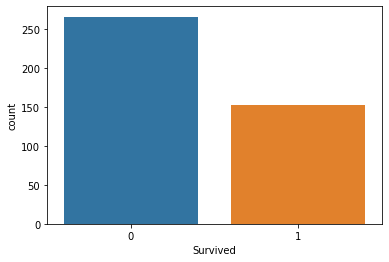

In [15]:
sns.countplot(x="Survived",data=titan)
print(titan["Survived"].value_counts())

3    218
1    107
2     93
Name: Pclass, dtype: int64


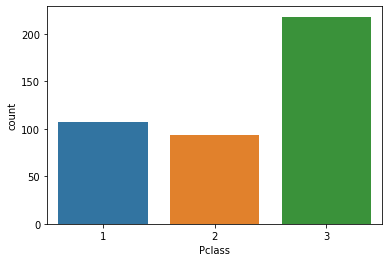

In [55]:
sns.countplot(x="Pclass",data=titan)
print(titan["Pclass"].value_counts())

male      266
female    152
Name: Sex, dtype: int64


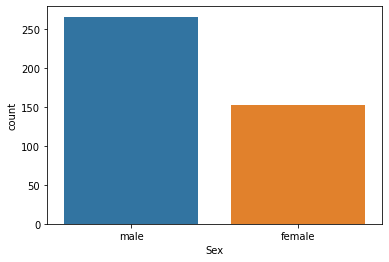

In [56]:
sns.countplot(x="Sex",data=titan)
print(titan["Sex"].value_counts())

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64


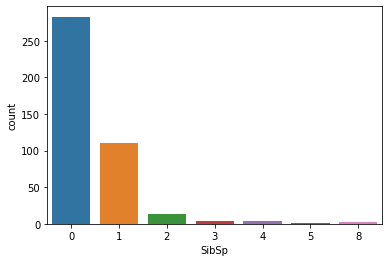

In [57]:
sns.countplot(x="SibSp",data=titan)
print(titan["SibSp"].value_counts())

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64


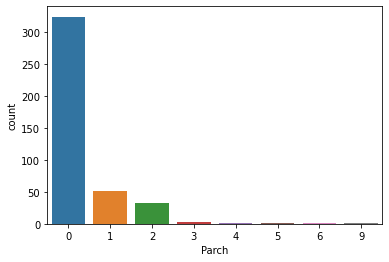

In [58]:
sns.countplot(x="Parch",data=titan)
print(titan["Parch"].value_counts())

S    270
C    102
Q     46
Name: Embarked, dtype: int64


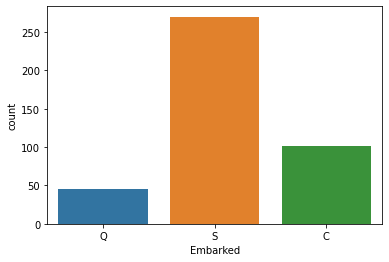

In [59]:
sns.countplot(x="Embarked",data=titan)
print(titan["Embarked"].value_counts())

<AxesSubplot:ylabel='Frequency'>

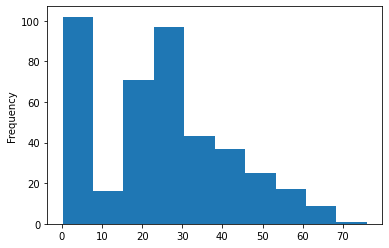

In [60]:
titan['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

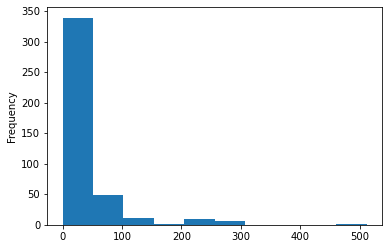

In [61]:
titan['Fare'].plot.hist()

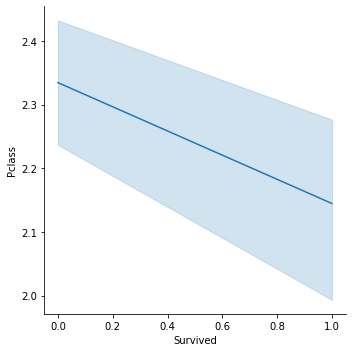

In [17]:
sns.relplot(
    data=titan, kind="line",
    x="Survived", y="Pclass") 

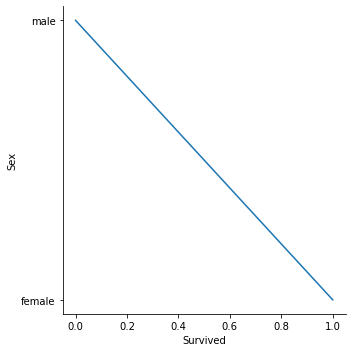

In [19]:
sns.relplot(
    data=titan, kind="line",
    x="Survived", y="Sex") 

<AxesSubplot:title={'center':'Comparision between Survived and Age'}, xlabel='Survived', ylabel='Age'>

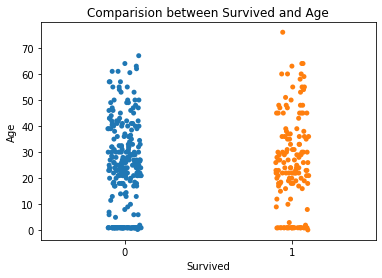

In [20]:
plt.title("Comparision between Survived and Age")
sns.stripplot(x="Survived",y="Age",data=titan)

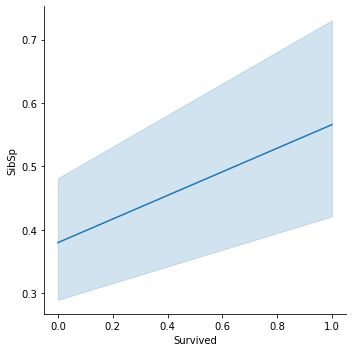

In [21]:
sns.relplot(
    data=titan, kind="line",
    x="Survived", y="SibSp")

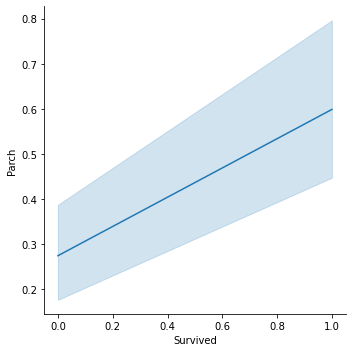

In [22]:
sns.relplot(
    data=titan, kind="line",
    x="Survived", y="Parch")

<AxesSubplot:title={'center':'Comparision between Survived and Fare'}, xlabel='Survived', ylabel='Fare'>

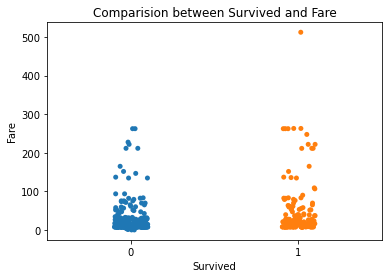

In [23]:
plt.title("Comparision between Survived and Fare")
sns.stripplot(x="Survived",y="Fare",data=titan)

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


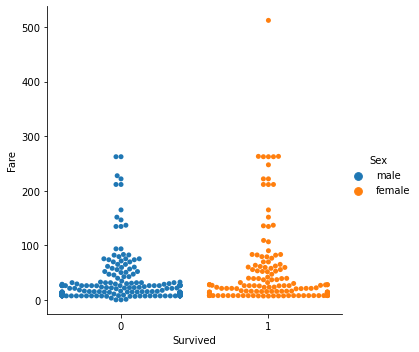

In [25]:
sns.catplot(data=titan, kind="swarm", x="Survived", y="Fare", hue="Sex")

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


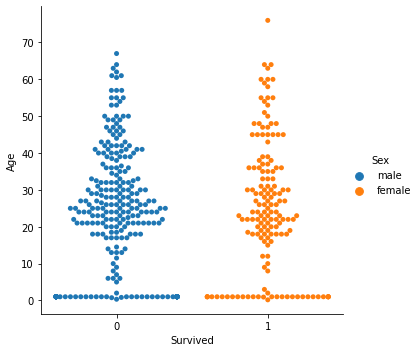

In [26]:
sns.catplot(data=titan, kind="swarm", x="Survived", y="Age", hue="Sex")

In [27]:
titan

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,1.0,0,0,A.5. 3236,8.0500,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,0,3,male,1.0,0,0,359309,8.0500,S


In [28]:
#ticket no is not needed
titan.drop(["Ticket"],axis=1,inplace=True)

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
titan["Sex"].unique()

array(['male', 'female'], dtype=object)

In [31]:
lb=LabelEncoder()

In [32]:
titan["Sex"]=lb.fit_transform(titan["Sex"])

In [33]:
titan["Sex"].value_counts()

1    266
0    152
Name: Sex, dtype: int64

In [34]:
titan["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [35]:
titan["Embarked"]=lb.fit_transform(titan["Embarked"])

In [36]:
titan["Embarked"].value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [37]:
titan

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,1.0,0,0,8.0500,2
414,1,1,0,39.0,0,0,108.9000,0
415,0,3,1,38.5,0,0,7.2500,2
416,0,3,1,1.0,0,0,8.0500,2


In [38]:
titan.skew()

Survived    0.568991
Pclass     -0.534170
Sex        -0.568991
Age         0.289155
SibSp       4.168337
Parch       4.654462
Fare        3.690408
Embarked   -0.873825
dtype: float64

In [40]:
cor=titan.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.108615,-1.000000,0.052778,0.099943,0.159120,0.192417,-0.076281
Pclass,-0.108615,1.000000,0.108615,-0.514894,0.001087,0.018721,-0.577651,0.227983
Sex,-1.000000,0.108615,1.000000,-0.052778,-0.099943,-0.159120,-0.192417,0.076281
Age,0.052778,-0.514894,-0.052778,1.000000,-0.006162,-0.025687,0.363756,-0.055658
SibSp,0.099943,0.001087,-0.099943,-0.006162,1.000000,0.306895,0.172151,0.052708
Parch,0.159120,0.018721,-0.159120,-0.025687,0.306895,1.000000,0.230490,0.054577
Fare,0.192417,-0.577651,-0.192417,0.363756,0.172151,0.230490,1.000000,-0.257954
Embarked,-0.076281,0.227983,0.076281,-0.055658,0.052708,0.054577,-0.257954,1.000000


In [41]:
# checking the outliers

<AxesSubplot:>

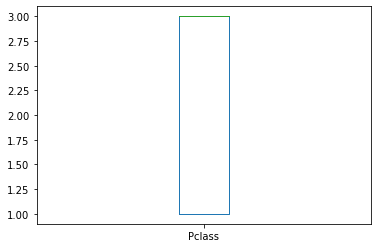

In [42]:
titan["Pclass"].plot.box()

<AxesSubplot:>

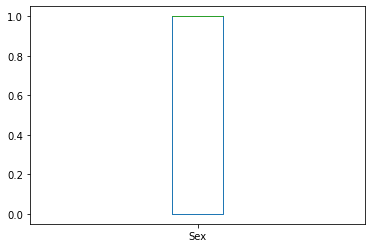

In [43]:
titan["Sex"].plot.box()

<AxesSubplot:>

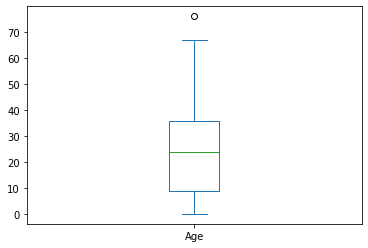

In [44]:
titan["Age"].plot.box()

<AxesSubplot:>

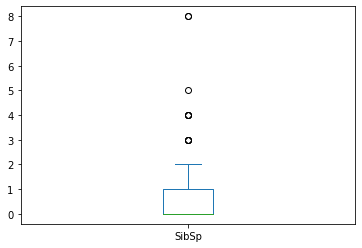

In [45]:
titan["SibSp"].plot.box()

<AxesSubplot:>

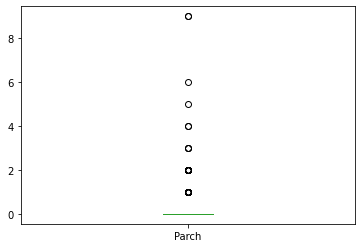

In [46]:
titan["Parch"].plot.box()

<AxesSubplot:>

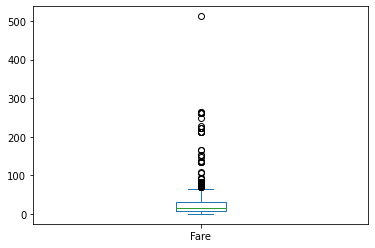

In [47]:
titan["Fare"].plot.box()

<AxesSubplot:>

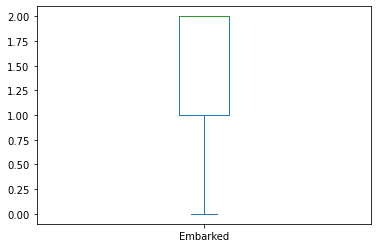

In [48]:
titan["Embarked"].plot.box()

#accuracy is the no of correct predictions/total no of predictions
#confusion matrix shows type 1 and type 2 error
#The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision), shows what % of positive predictions are correct
#precision says hat % of predictions are correct
#Precision = TP/(TP + FP), it is accuracy of positive predictions
#Recall is the fraction of positive that are correctly identified
#Recall = TP/(TP+FN)
#FPR=FP/FP+TN
#TPR=TP/TP+FN, FN is False negative and TP is true Positive
#Standard scalling is done to make the datapoints generalised so the distance between them is lower

In [49]:
x = titan.drop('Survived', axis=1).copy()
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,1.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,1.0,0,0,8.0500,2


In [50]:
y = titan['Survived'].copy()
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [53]:
x_train.shape

(292, 7)

In [54]:
y_train.shape

(292,)

In [55]:
x_test.shape

(126, 7)

In [56]:
y_test.shape

(126,)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 0.87348191,  0.75592895,  0.59250061, ..., -0.4002477 ,
        -0.49669335, -0.47091535],
       [ 0.87348191, -1.32287566,  1.31506233, ..., -0.4002477 ,
        -0.51155375,  0.70076689],
       [-0.31581919,  0.75592895,  2.18213639, ..., -0.4002477 ,
        -0.46339008, -0.47091535],
       ...,
       [ 0.87348191,  0.75592895,  0.82372036, ..., -0.4002477 ,
        -0.50707341,  0.70076689],
       [ 0.87348191,  0.75592895, -1.3439648 , ..., -0.4002477 ,
        -0.49273631,  0.70076689],
       [ 0.87348191,  0.75592895, -1.3439648 , ...,  0.61989583,
        -0.23631202, -1.64259759]])

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
lg=LogisticRegression()

In [61]:
lg.fit(x_train,y_train)

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
pred=lg.predict(x_test)

In [63]:
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [64]:
accuracy_score(y_test,pred)

1.0

In [65]:
print(confusion_matrix(y_test,pred))

[[85  0]
 [ 0 41]]


In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [67]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [68]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [69]:
y_pred_prob

array([0.03129109, 0.96304114, 0.0296023 , 0.02841675, 0.93639019,
       0.03394734, 0.93137127, 0.03419519, 0.93573573, 0.02760098,
       0.03269278, 0.94643944, 0.94257261, 0.95743578, 0.02760098,
       0.03105677, 0.93129012, 0.03642775, 0.03987787, 0.03194128,
       0.03128218, 0.03823616, 0.93641964, 0.03055994, 0.94134395,
       0.93412934, 0.95368213, 0.03285168, 0.03370751, 0.03055994,
       0.0293712 , 0.93591854, 0.9570968 , 0.02760098, 0.93551933,
       0.0302435 , 0.93450252, 0.03331486, 0.9414766 , 0.05839445,
       0.93450252, 0.93959838, 0.03448425, 0.03390783, 0.03750898,
       0.02807085, 0.95628777, 0.94723968, 0.94907901, 0.02839667,
       0.02995625, 0.93879636, 0.92977665, 0.03082487, 0.03403128,
       0.94103233, 0.02760098, 0.03045432, 0.93914545, 0.02964323,
       0.03095325, 0.03021235, 0.94663121, 0.03365578, 0.94291128,
       0.0302435 , 0.02856182, 0.02812315, 0.03803008, 0.04016197,
       0.05399598, 0.03296446, 0.02832103, 0.94134883, 0.03822

In [70]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)

In [71]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.56470588, 0.58823529, 0.6       , 0.62352941, 0.70588235,
       0.72941176, 0.92941176, 0.97647059, 1.        ])

In [72]:
tpr

array([0.        , 0.02439024, 0.80487805, 0.85365854, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [75]:
thersholds

array([1.97493761, 0.97493761, 0.93488795, 0.93450252, 0.92977665,
       0.03058916, 0.03055994, 0.03045432, 0.0302435 , 0.0293712 ,
       0.02909369, 0.02764562, 0.02760098, 0.02753374])

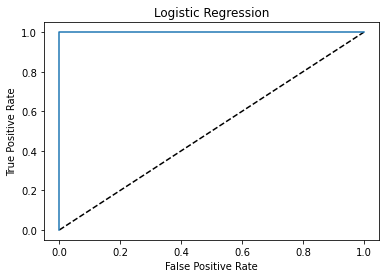

In [76]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [77]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [78]:
auc_score

1.0